In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [48]:
#Reading the dataset from the file 
data= pd.read_csv('C:/Users/BIDIT/OneDrive/Documents/Machine Learning/Assignment-3/Datasets/Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv')
data

,Date,Consumption,avg_max,avg_min,avg_rain,avg_temp
0,2018-01-01,87.3,23.775773,11.385371,0.0,17.580572
1,2018-01-02,87.9,23.422979,11.027654,0.0,17.225316
2,2018-01-03,92.1,21.428075,10.351028,0.0,15.889552
3,2018-01-04,96.6,20.518272,9.465577,0.0,14.991924
4,2018-01-05,98.5,21.488783,8.556001,0.0,15.022392
...,...,...,...,...,...,...
1000,2020-12-27,110.0,23.572216,10.109815,0.0,16.841016
1001,2020-12-28,111.1,23.569913,9.930083,0.0,16.749998
1002,2020-12-29,116.1,23.504397,10.118490,0.0,16.811444
1003,2020-12-30,115.9,24.180420,10.423822,0.0,17.302121


**Plots of  Power Consumption versus Average of maximum temperature, Average of minimum temperature and Average of rainfall**

Text(0, 0.5, 'Average of maximum temperature')

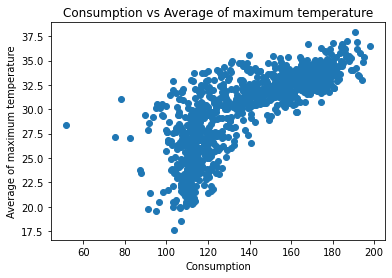

In [14]:
%matplotlib inline
plt.scatter(data['Consumption'],data['avg_max'])
plt.title("Consumption vs Average of maximum temperature")
plt.xlabel("Consumption")
plt.ylabel("Average of maximum temperature")

Text(0, 0.5, 'Average of minimum temperature')

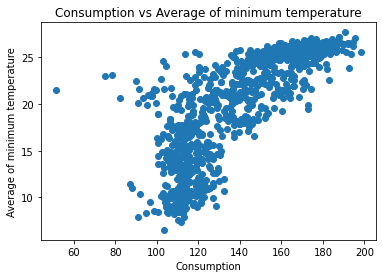

In [15]:
plt.scatter(data['Consumption'],data['avg_min'])
plt.title("Consumption vs Average of minimum temperature")
plt.xlabel("Consumption")
plt.ylabel("Average of minimum temperature")

Text(0, 0.5, 'Average rainfall')

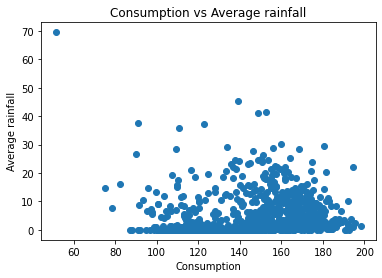

In [16]:
plt.scatter(data['Consumption'],data['avg_rain'])
plt.title("Consumption vs Average rainfall")
plt.xlabel("Consumption")
plt.ylabel("Average rainfall")

#### Splitting the dataset into train test and validation dataset 

In [49]:
# Extract the year from the Date column
data['Year'] = pd.DatetimeIndex(data['Date']).year

# Split the data into training and testing sets
train = data[data['Year'] != 2020]
test = data[data['Year'] == 2020]

# Split the training set into validation and training sets
n = len(train)
n_validation = int(n * 0.2)
n_train = n - n_validation

validation = train.iloc[n_train:]
training = train.iloc[:n_train]
print(training)
print(validation)


           Date  Consumption    avg_max    avg_min   avg_rain   avg_temp  Year
0    2018-01-01         87.3  23.775773  11.385371   0.000000  17.580572  2018
1    2018-01-02         87.9  23.422979  11.027654   0.000000  17.225316  2018
2    2018-01-03         92.1  21.428075  10.351028   0.000000  15.889552  2018
3    2018-01-04         96.6  20.518272   9.465577   0.000000  14.991924  2018
4    2018-01-05         98.5  21.488783   8.556001   0.000000  15.022392  2018
..          ...          ...        ...        ...        ...        ...   ...
546  2019-08-12        164.8  33.913595  26.340721   7.486580  30.127158  2019
547  2019-08-13        150.5  31.355180  25.208455  23.751364  28.281818  2019
548  2019-08-14        152.2  31.255081  25.634283  20.063424  28.444682  2019
549  2019-08-15        138.2  32.035204  25.653732  21.442683  28.844468  2019
550  2019-08-16        157.1  32.391617  25.929152   7.325333  29.160385  2019

[551 rows x 7 columns]
           Date  Consumption

### Selecting the coloumns of interest

In [50]:
# Select the columns of interest
X_train = training[['avg_max', 'avg_min', 'avg_rain']]
y_train = training['Consumption']

X_validation = validation[['avg_max', 'avg_min', 'avg_rain']]
y_validation = validation['Consumption']

X_test = test[['avg_max', 'avg_min', 'avg_rain']]
y_test = test['Consumption']


### Defining the regression models

In [42]:
def lls_regression(X, y, degree):
    X_poly = np.column_stack([X**i for i in range(1, degree+1)]) # Create polynomial features
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1)))) # Add a column of 1s for the intercept term
    W = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y) # Compute the weight matrix
    return W
# def lls_regression(X, y, degree):
#     X_poly = np.column_stack([X**i for i in range(1, degree+1)]) # Create polynomial features
#     for i in range(2, degree+1):
#         for j in range(1, i):
#             X_poly = np.column_stack((X_poly, (X**j)*(X**(i-j)))) # Add interaction terms between different degrees
#     X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1)))) # Add a column of 1s for the intercept term
#     W = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y) # Compute the weight matrix
#     return W


def ridge_regression(X, y, lmbda):
    X = np.hstack((X, np.ones((X.shape[0], 1)))) # Add a column of 1s for the intercept term
    W = np.linalg.inv(X.T.dot(X) + lmbda*np.eye(X.shape[1])).dot(X.T).dot(y) # Compute the weight matrix
    return W

def lasso_regression(X_train, y_train, lmbda):
    """
    Lasso regression function that fits a lasso regression model on the training data with a given regularization parameter
    and returns the learned model coefficients using coordinate descent.
    
    Parameters:
    X_train (numpy array): Numpy array containing training features.
    y_train (numpy array): Numpy array containing training labels.
    lmbda (float): Regularization parameter lmbda.
    
    Returns:
    w (numpy array): Learned model coefficients.
    """
    # Normalize the input features
    X_train_norm = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    
    # Initialize model coefficients w as all zeros
    w = np.zeros(X_train.shape[1])
    
    # Set tolerance
    tol = 1e-4
    
    # Set maximum number of iterations
    max_iter = 1000
    
    # Loop until convergence or maximum number of iterations is reached
    for i in range(max_iter):
        # Keep track of the maximum change in any coefficient
        max_change = 0
        
        # Iterate over each feature
        for j in range(X_train_norm.shape[1]):
            # Compute the current residual (excluding the jth feature)
            r_j = y_train - X_train_norm[:, w != 0].dot(w[w != 0]) 
            
            # Compute the coordinate-wise gradient for the jth feature
            gj = X_train_norm[:, j].dot(r_j)
            
            # Compute the soft-thresholding operator
            zj = lmbda / 2
            if gj < -zj:
                wj = (gj + zj) / np.linalg.norm(X_train_norm[:, j])**2
            elif gj > zj:
                wj = (gj - zj) / np.linalg.norm(X_train_norm[:, j])**2
            else:
                wj = 0
                
            # Update the jth coefficient
            if w[j] != wj:
                max_change = max(max_change, abs(w[j] - wj))
                w[j] = wj
        
        # Check for convergence
        if max_change < tol:
            break
        
    return w



### Defining the regression model for ridge and lasso with a degree parameter to the above functions implemented

In [51]:
def ridge_regression_d(X, y, lmbda, degree):
    X_poly = np.ones((X.shape[0], 1)) # start with a column of 1s for the intercept term
    for d in range(1, degree+1):
        X_poly = np.hstack((X_poly, X**d)) # add polynomial features up to degree d
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1)))) # add a column of 1s for the intercept term
    W = np.linalg.inv(X_poly.T.dot(X_poly) + lmbda*np.eye(X_poly.shape[1])).dot(X_poly.T).dot(y)
    return W

def lasso_regression_d(X_train, y_train, lmbda, degree=1):
    """
    Lasso regression function that fits a lasso regression model on the training data with a given regularization parameter
    and returns the learned model coefficients using coordinate descent.

    degree (int): Degree of polynomial feature expansion (default is 1).
    """
    # Generate polynomial features
    X_train_poly = np.ones((len(X_train), 1))
    for i in range(1, degree+1):
        X_train_poly = np.hstack((X_train_poly, X_train**i))

    # Normalize the input features
    X_train_poly_norm = (X_train_poly - np.mean(X_train_poly, axis=0)) / np.std(X_train_poly, axis=0)

    # Initialize model coefficients w as all zeros
    w = np.zeros(X_train_poly_norm.shape[1])

    # Set tolerance
    tol = 1e-4

    # Set maximum number of iterations
    max_iter = 1000

    # Loop until convergence or maximum number of iterations is reached
    for i in range(max_iter):
        # Keep track of the maximum change in any coefficient
        max_change = 0

        # Iterate over each feature
        for j in range(X_train_poly_norm.shape[1]):
            # Compute the current residual (excluding the jth feature)
            r_j = y_train - X_train_poly_norm[:, w != 0].dot(w[w != 0]) 

            # Compute the coordinate-wise gradient for the jth feature
            gj = X_train_poly_norm[:, j].dot(r_j)

            # Compute the soft-thresholding operator
            zj = lmbda / 2
            if gj < -zj:
                wj = (gj + zj) / np.linalg.norm(X_train_poly_norm[:, j])**2
            elif gj > zj:
                wj = (gj - zj) / np.linalg.norm(X_train_poly_norm[:, j])**2
            else:
                wj = 0

            # Update the jth coefficient
            if w[j] != wj:
                max_change = max(max_change, abs(w[j] - wj))
                w[j] = wj

        # Check for convergence
        if max_change < tol:
            break

    return w


### Converting the data from pandas dataframe to numpy array

In [52]:
# Define the data (Xi, Yi)
X_train = np.array(training[['avg_max', 'avg_min', 'avg_rain']])
y_train = np.array(training['Consumption'])

X_validation = np.array(validation[['avg_max', 'avg_min', 'avg_rain']])
y_validation = np.array(validation['Consumption'])

X_test = np.array(test[['avg_max', 'avg_min', 'avg_rain']])
y_test = np.array(test['Consumption'])

### Applying the LLS, Ridge & Lasso to the data

### Plotting the LLS regression for varying degrees of the polynomial fitting in the validation set

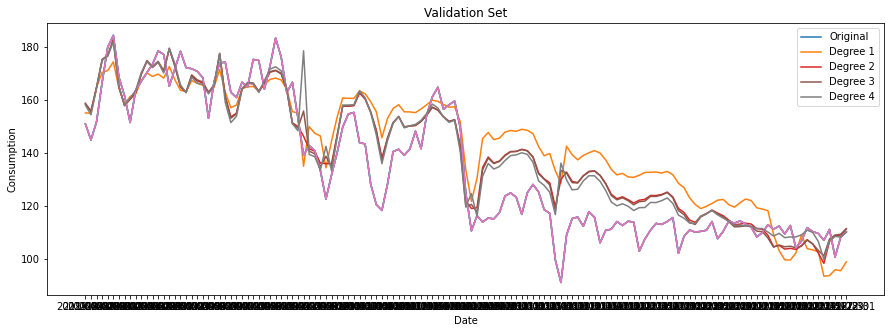

In [43]:
# Define a list of degrees to try
degrees = [1,2,3,4]

# Plot the original and predicted consumption values for the validation set for each degree of polynomial
plt.figure(figsize=(15,5))

for degree in degrees:
    try:
        # Fit the model and make predictions for the validation set
        W = lls_regression(X_train, y_train, degree)
        X_poly = np.column_stack([X_validation**i for i in range(1, degree+1)])
        X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
        y_validation_pred = np.dot(X_poly, W)

        # Plot the predictions
        label = f'Degree {degree}'
        plt.plot(validation['Date'], y_validation, label='Original' if degree == 1 else None)
        plt.plot(validation['Date'], y_validation_pred, label=label)

    except np.linalg.LinAlgError:
        print(f"Singular matrix for degree {degree}")
    
plt.legend()
plt.title('Validation Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


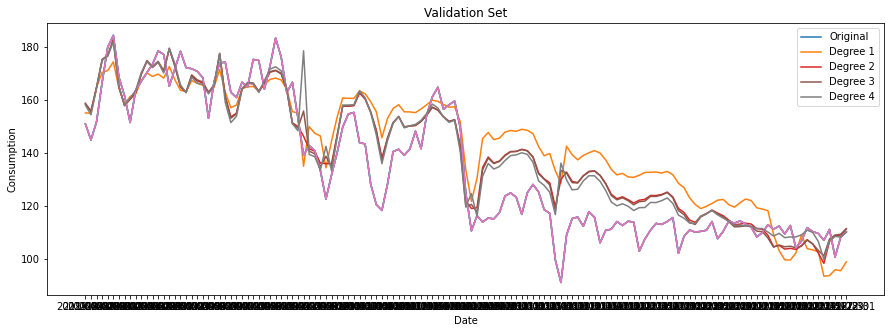

In [44]:
# Define a list of degrees to try
degrees = [1,2,3,4,]

# Plot the original and predicted consumption values for the validation set for each degree of polynomial
plt.figure(figsize=(15,5))

for degree in degrees:
    # Fit the model and make predictions for the validation set
    W = lls_regression(X_train, y_train, degree)
    X_poly = np.column_stack([X_validation**i for i in range(1, degree+1)])
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
    y_validation_pred = np.dot(X_poly, W)
    
    # Plot the predictions
    label = f'Degree {degree}'
    plt.plot(validation['Date'], y_validation, label='Original' if degree == 1 else None)
    plt.plot(validation['Date'], y_validation_pred, label=label)
    
plt.legend()
plt.title('Validation Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


### Evaluating the RMSE and R^2 for varying degrees of polynomial in LLS Regression

Degree 1: RMSE = 15.99, R2 = 0.61
Degree 2: RMSE = 11.35, R2 = 0.80
Degree 3: RMSE = 11.40, R2 = 0.80
Degree 4: RMSE = 11.24, R2 = 0.81


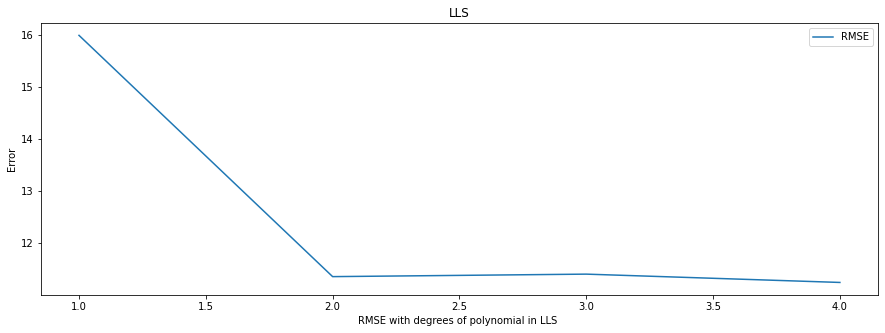

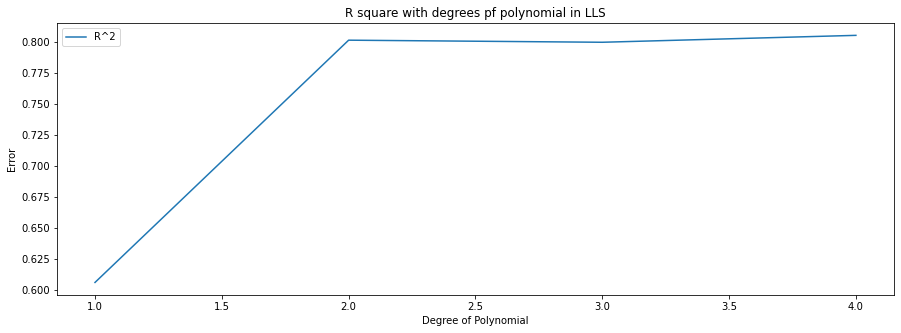

In [33]:
degrees = [1, 2, 3, 4] # Range of degrees to try
rmse_vals = []
r2_vals = []

for degree in degrees:
    # Fit the model using the training set
    W = lls_regression(X_train, y_train, degree)
    
    # Make predictions on the validation set
    X_val_poly = np.column_stack([X_validation**i for i in range(1, degree+1)])
    X_val_poly = np.hstack((X_val_poly, np.ones((X_val_poly.shape[0], 1))))
    y_val_pred = np.dot(X_val_poly, W)
    
    # Compute RMSE and R2 on the validation set
    rmse_val = np.sqrt(np.mean((y_validation - y_val_pred)**2))
    r2_val = 1 - np.sum((y_validation - y_val_pred)**2) / np.sum((y_validation - np.mean(y_validation))**2)
    
    # Append the RMSE and R^2 values to the lists
    rmse_vals.append(rmse_val)
    r2_vals.append(r2_val)
    
    print(f"Degree {degree}: RMSE = {rmse_val:.2f}, R2 = {r2_val:.2f}")

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(degrees, rmse_vals, label='RMSE')
# plt.plot(degrees, r2_vals, label='R^2')
plt.legend()
plt.title('LLS')
plt.xlabel('RMSE with degrees of polynomial in LLS ')
plt.ylabel('Error')
plt.show()

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(degrees, r2_vals, label='R^2')
plt.legend()
plt.title('R square with degrees pf polynomial in LLS')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.show()

### Predict the output for the Test sets

**Considering the polynomial of degree 2 and 3 in the LLS regression model as we are getting a significantly high R^2 value in degree 2 and 3 to predict the test data**

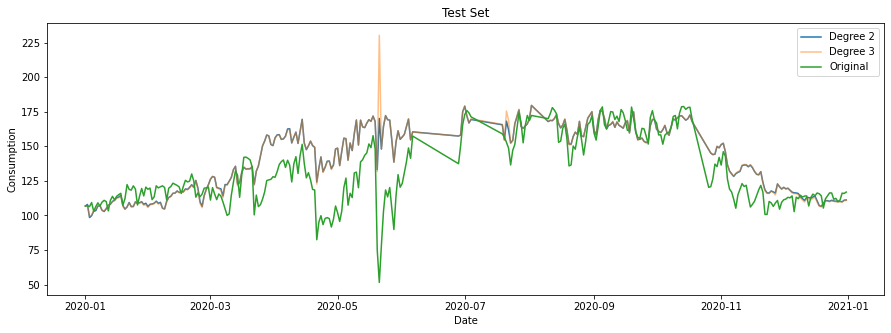

Degree 2: RMSE = 19.56, R2 = 0.37
Degree 3: RMSE = 20.98, R2 = 0.28


In [31]:
d = [2, 3]
rmse_test = []
r2_test = []

plt.figure(figsize=(15,5))
dates = pd.to_datetime(test['Date'])
for degree in d:
    # Fit the model and make predictions for the test set
    W = lls_regression(X_train, y_train, degree)
    X_poly = np.column_stack([X_test**i for i in range(1, degree+1)])
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
    y_test_pred = np.dot(X_poly, W)
    
    # Compute RMSE and R2 on the test set
    rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    r2 = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
    rmse_test.append(rmse)
    r2_test.append(r2)
    
    # Plot the predictions
    label = f'Degree {degree}'
    if degree == 2:
        plt.plot(dates, y_test_pred, label=label)
    else:
        plt.plot(dates, y_test_pred, label=label, alpha=0.5)
        
# Plot the original values
plt.plot(dates, y_test, label='Original')
    
plt.legend()
plt.title('Test Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

print(f"Degree 2: RMSE = {rmse_test[0]:.2f}, R2 = {r2_test[0]:.2f}")
print(f"Degree 3: RMSE = {rmse_test[1]:.2f}, R2 = {r2_test[1]:.2f}")


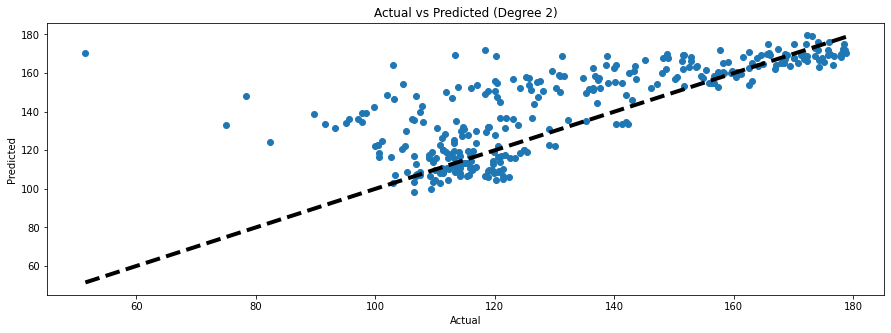

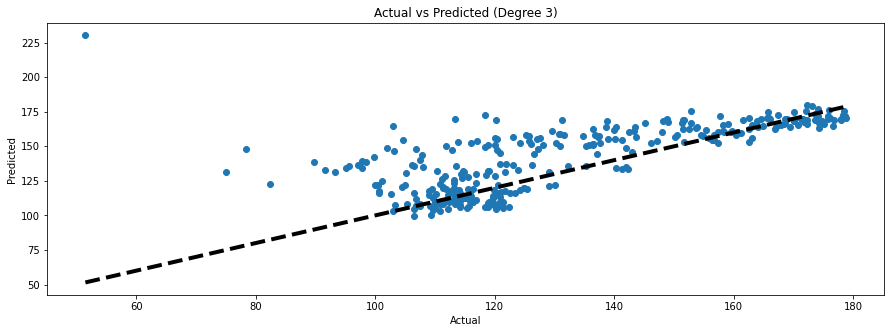

In [36]:
# Plot the actual vs predicted values for degree 2
W = lls_regression(X_train, y_train, 2)
X_poly = np.column_stack([X_test**i for i in range(1, 3)])
X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
y_test_pred = np.dot(X_poly, W)

fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (Degree 2)')

plt.show()

# Plot the actual vs predicted values for degree 3
W = lls_regression(X_train, y_train, 3)
X_poly = np.column_stack([X_test**i for i in range(1, 4)])
X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
y_test_pred = np.dot(X_poly, W)

fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (Degree 3)')

plt.show()


### Applying the Ridge regression in the validation dataset for the varying values of lamda

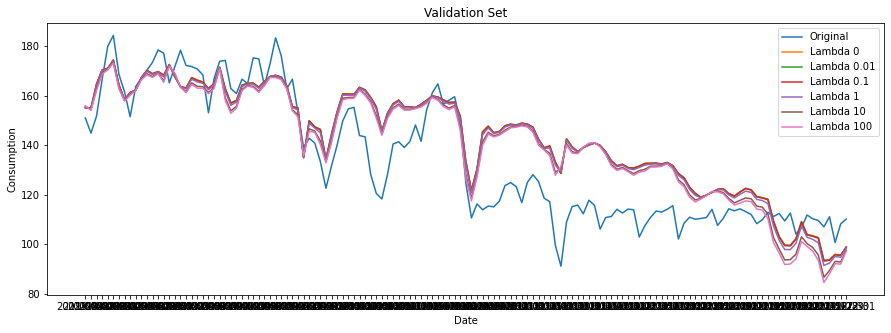

In [37]:
# Plot the original and predicted consumption values for the validation set in ridge regression
lambdas=[0,0.01,0.1,1,10,100]
plt.figure(figsize=(15,5))
plt.plot(validation['Date'], y_validation, label='Original')
for lmbda in lambdas:
    # Fit the model using the training set
    W = ridge_regression(X_train, y_train, lmbda)

    # Make predictions on the validation set
    y_val_pred = np.dot(np.hstack((X_validation, np.ones((X_validation.shape[0], 1)))), W)

    # Plot the predicted values
    plt.plot(validation['Date'], y_val_pred, label=f"Lambda {lmbda}")
plt.legend()
plt.title('Validation Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


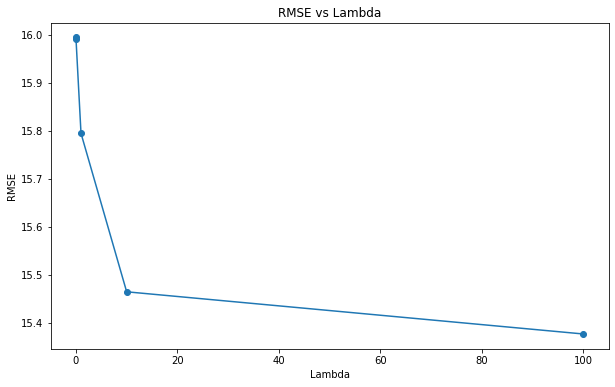

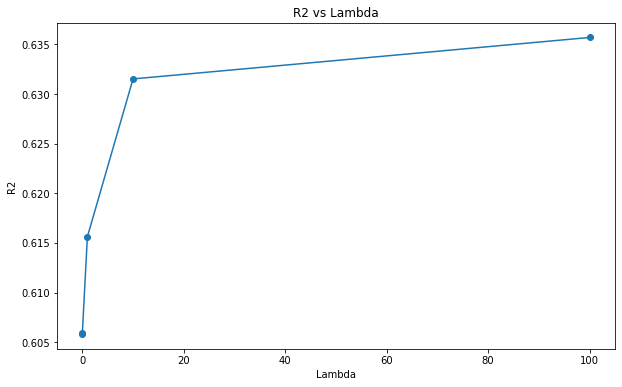

RMSE values:
Lambda = 0.001: RMSE = 15.99
Lambda = 0.01: RMSE = 15.99
Lambda = 1: RMSE = 15.79
Lambda = 10: RMSE = 15.46
Lambda = 100: RMSE = 15.38
R2 values:
Lambda = 0.001: R2 = 0.61
Lambda = 0.01: R2 = 0.61
Lambda = 1: R2 = 0.62
Lambda = 10: R2 = 0.63
Lambda = 100: R2 = 0.64


In [64]:
# Initialize empty lists to store RMSE and R2 values for each lambda
rmse_vals = []
r2_vals = []

# Loop over lambda values
for lmbda in lambdas:
    # Fit the model using the training set
    W = ridge_regression(X_train, y_train, lmbda)

    # Make predictions on the validation set
    y_val_pred = np.dot(np.hstack((X_validation, np.ones((X_validation.shape[0], 1)))), W)

    # Compute RMSE and R2 on the validation set
    rmse_val = np.sqrt(np.mean((y_validation - y_val_pred)**2))
    r2_val = 1 - np.sum((y_validation - y_val_pred)**2) / np.sum((y_validation - np.mean(y_validation))**2)
    
    # Append RMSE and R2 values to lists
    rmse_vals.append(rmse_val)
    r2_vals.append(r2_val)

# Plot RMSE values
plt.figure(figsize=(10,6))
plt.plot(lambdas, rmse_vals, '-o')
plt.title('RMSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.show()

# Plot R2 values
plt.figure(figsize=(10,6))
plt.plot(lambdas, r2_vals, '-o')
plt.title('R2 vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('R2')
plt.show()

# Print RMSE and R2 values
print('RMSE values:')
for lmbda, rmse_val in zip(lambdas, rmse_vals):
    print(f'Lambda = {lmbda}: RMSE = {rmse_val:.2f}')
    
print('R2 values:')
for lmbda, r2_val in zip(lambdas, r2_vals):
    print(f'Lambda = {lmbda}: R2 = {r2_val:.2f}')


### Choosing the lambda value 0.01 for the ridge regression to predict the test data

Lambda 0.01: RMSE = 21.60, R2 = 0.23


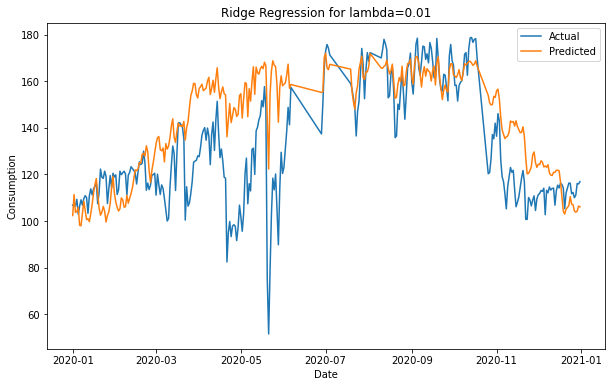

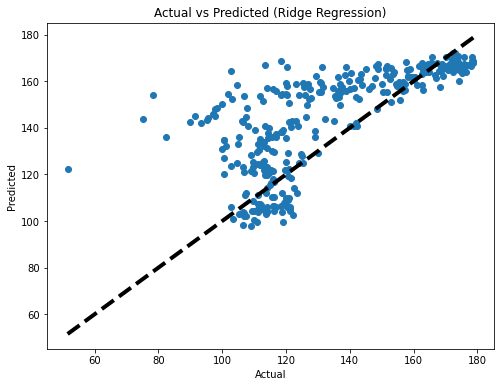

In [65]:
# Fit the model using the training set with lambda=0.01
W = ridge_regression(X_train, y_train, 0.01)

# Make predictions on the test set
y_test_pred = np.dot(np.hstack((X_test, np.ones((X_test.shape[0], 1)))), W)

# Compute RMSE and R2 on the test set
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
r2_test = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print(f"Lambda 0.01: RMSE = {rmse_test:.2f}, R2 = {r2_test:.2f}")

# Plot the original and predicted consumption values for the test set
dates = pd.to_datetime(test['Date'])
plt.figure(figsize=(10,6))
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_test_pred, label='Predicted')
plt.legend()
plt.title('Ridge Regression for lambda=0.01')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (Ridge Regression)')

plt.show()

### For varying degree plot the ridge regression

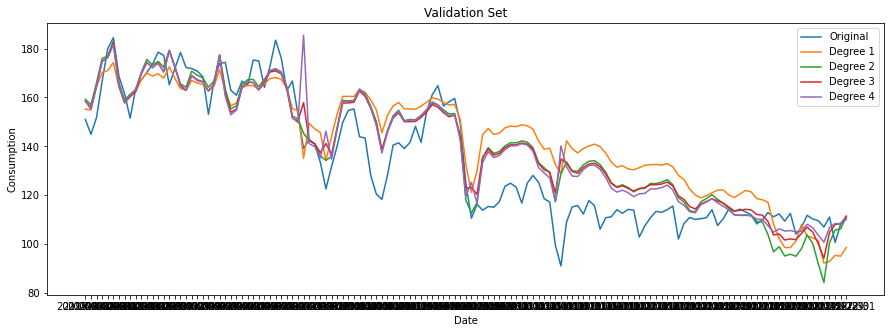

In [30]:
degrees=[1,2,3,4]
plt.figure(figsize=(15,5))
plt.plot(validation['Date'], y_validation, label='Original')
for degree in degrees:
    # Fit the model using the training set
    W = ridge_regression_d(X_train, y_train, lmbda=1, degree=degree)

    # Make predictions on the validation set
    X_val_poly = np.ones((X_validation.shape[0], 1)) # start with a column of 1s for the intercept term
    for d in range(1, degree+1):
        X_val_poly = np.hstack((X_val_poly, X_validation**d)) # add polynomial features up to degree d
    X_val_poly = np.hstack((X_val_poly, np.ones((X_val_poly.shape[0], 1)))) # add a column of 1s for the intercept term
    y_val_pred = np.dot(X_val_poly, W)

    # Plot the predicted values
    plt.plot(validation['Date'], y_val_pred, label=f"Degree {degree}")
plt.legend()
plt.title('Validation Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


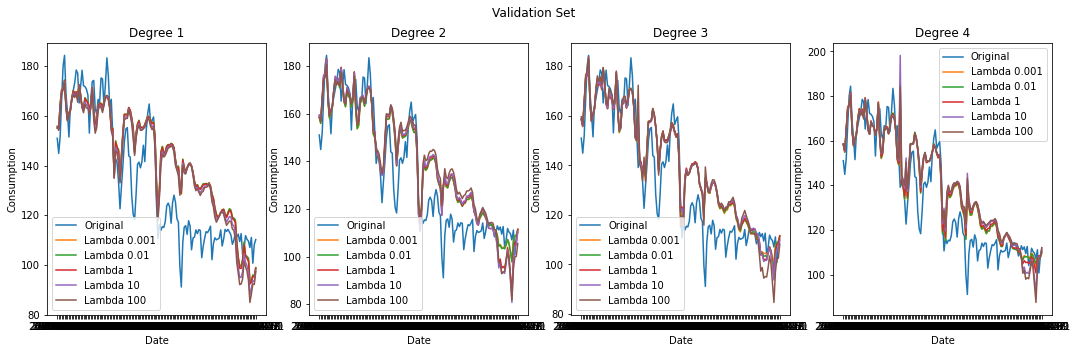

    Degree   Lambda       RMSE  R-squared
0        1    0.001  15.994368   0.605824
1        1    0.010  15.993116   0.605886
2        1    1.000  15.877841   0.611547
3        1   10.000  15.541554   0.627827
4        1  100.000  15.386562   0.635213
5        2    0.001  11.353602   0.801380
6        2    0.010  11.372578   0.800716
7        2    1.000  12.161980   0.772090
8        2   10.000  12.614753   0.754804
9        2  100.000  13.578411   0.715912
10       3    0.001  11.436771   0.798459
11       3    0.010  11.627291   0.791689
12       3    1.000  11.890891   0.782137
13       3   10.000  11.881618   0.782476
14       3  100.000  12.668113   0.752725
15       4    0.001  11.357217   0.801253
16       4    0.010  11.425902   0.798842
17       4    1.000  12.086688   0.774903
18       4   10.000  13.369110   0.724602
19       4  100.000  13.218976   0.730753


In [46]:
degrees=[1,2,3,4]
lambdas = [0.001,0.01,1,10,100] # vary lambda from 0 to 100 with a step size of 10
plt.figure(figsize=(18,5))
results = []
for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i+1)
    plt.plot(validation['Date'], y_validation, label='Original')

    for lmbda in lambdas:
        # Fit the model using the training set
        W = ridge_regression_d(X_train, y_train, lmbda=lmbda, degree=degree)

        # Make predictions on the validation set
        X_val_poly = np.ones((X_validation.shape[0], 1)) # start with a column of 1s for the intercept term
        for d in range(1, degree+1):
            X_val_poly = np.hstack((X_val_poly, X_validation**d)) # add polynomial features up to degree d
        X_val_poly = np.hstack((X_val_poly, np.ones((X_val_poly.shape[0], 1)))) # add a column of 1s for the intercept term
        y_val_pred = np.dot(X_val_poly, W)
        
         # Calculate RMSE and R-squared
        rmse = np.sqrt(np.mean((y_validation - y_val_pred)**2))
        r2 = 1 - np.sum((y_validation - y_val_pred)**2) / np.sum((y_validation - np.mean(y_validation))**2)

        # Add results to list
        results.append((degree, lmbda, rmse, r2))

        # Plot the predicted values
        plt.plot(validation['Date'], y_val_pred, label=f"Lambda {lmbda}")
    plt.legend()
    plt.title(f'Degree {degree}')
    plt.xlabel('Date')
    plt.ylabel('Consumption')

plt.suptitle('Validation Set')
plt.show()

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['Degree', 'Lambda', 'RMSE', 'R-squared'])
print(results_df)

### Applying Ridge Regression to the test set for lambda=0.01 and degree=2

Test set RMSE: 19.568848420525775
Test set R-squared: 0.3719341247631197


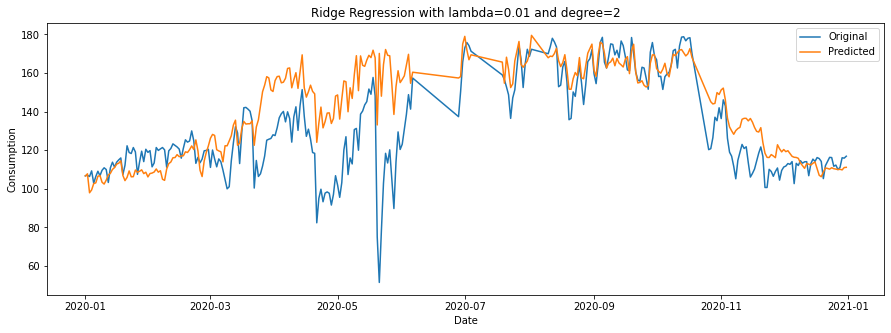

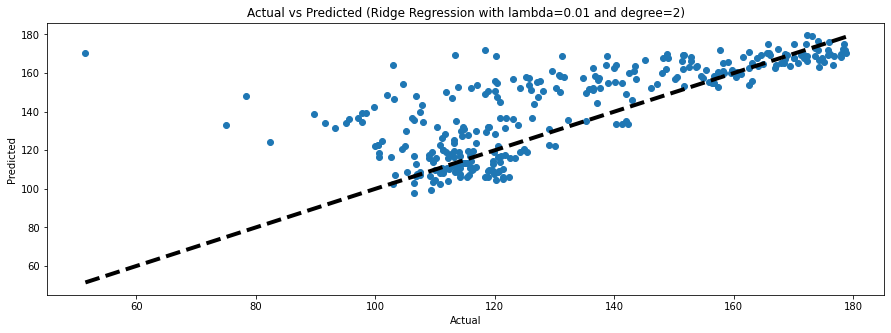

In [52]:
# Fit the model using the training set
W = ridge_regression_d(X_train, y_train, lmbda=0.01, degree=2)

# Make predictions on the test set
X_test_poly = np.ones((X_test.shape[0], 1)) # start with a column of 1s for the intercept term
for d in range(1, 3):
    X_test_poly = np.hstack((X_test_poly, X_test**d)) # add polynomial features up to degree 2
X_test_poly = np.hstack((X_test_poly, np.ones((X_test_poly.shape[0], 1)))) # add a column of 1s for the intercept term
y_test_pred = np.dot(X_test_poly, W)

# Calculate RMSE and R-squared for the test set
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
r2_test = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("Test set RMSE:", rmse_test)
print("Test set R-squared:", r2_test)
dates = pd.to_datetime(test['Date'])

plt.figure(figsize=(15,5))
plt.plot(dates, y_test, label='Original')
plt.plot(dates, y_test_pred, label='Predicted')
plt.legend()
plt.title('Ridge Regression with lambda=0.01 and degree=2')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()


fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (Ridge Regression with lambda=0.01 and degree=2)')

plt.show()


### Plotting the graph for the Lasso Regression in the validation dataset for varying lambda

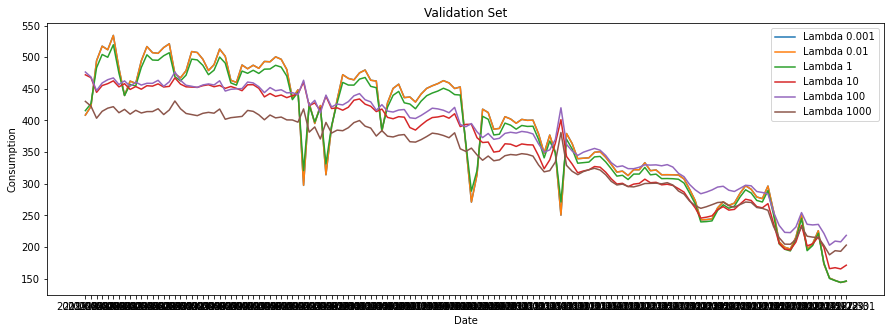

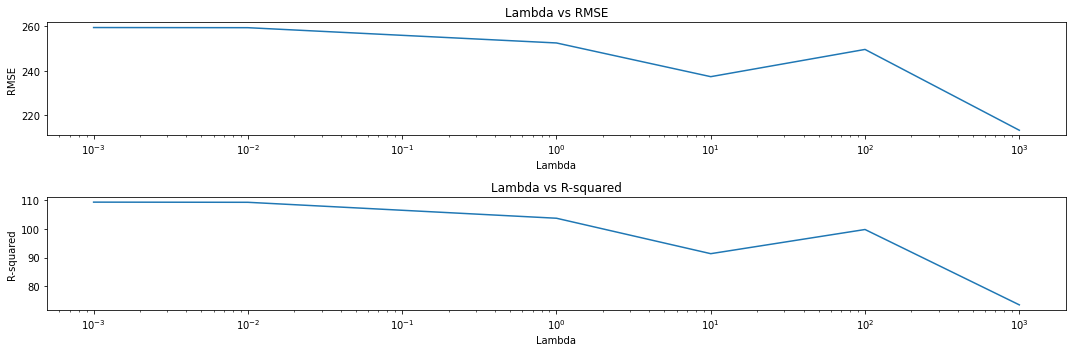

     Lambda        RMSE         R^2
0     0.001  259.360895  109.413156
1     0.010  259.293010  109.357130
2     1.000  252.445214  103.767631
3    10.000  237.331480   91.345195
4   100.000  249.544926   99.817702
5  1000.000  213.301638   73.400970


In [12]:
# Define a list of lambda values to try
lambda_values = [0.001,0.01,1, 10, 100, 1000]

# Initialize lists to store RMSE and R-squared values for each lambda
rmse_values = []
r2_values = []
results = []

plt.figure(figsize=(15,5))
# Loop through lambda values and fit a lasso regression model for each one
for lmbda in lambda_values:
    # Fit the model using the training data
    w = lasso_regression(X_train, y_train, lmbda)
    
    # Make predictions on the validation data
    y_pred = X_validation.dot(w)
    
    # Calculate RMSE and R-squared values
    mse = np.mean((y_pred - y_validation) ** 2)
    rmse = np.sqrt(mse)
    ssr = np.sum((y_pred - y_validation.mean()) ** 2)
    sst = np.sum((y_validation - y_validation.mean()) ** 2)
    r2 = ssr / sst
    
    # Append values to lists
    rmse_values.append(rmse)
    r2_values.append(r2)
    results.append({
        'Lambda': lmbda,
        'RMSE': rmse,
        'R^2': r2
    })
    
      # Plot the predicted values
    plt.plot(validation['Date'], y_pred, label=f"Lambda {lmbda}")
plt.legend()
plt.title('Validation Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

ax[0].plot(lambda_values, rmse_values)
ax[0].set_xscale('log')
ax[0].set_xlabel('Lambda')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Lambda vs RMSE')

ax[1].plot(lambda_values, r2_values)
ax[1].set_xscale('log')
ax[1].set_xlabel('Lambda')
ax[1].set_ylabel('R-squared')
ax[1].set_title('Lambda vs R-squared')

plt.tight_layout()
plt.show()
# Convert results list to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

### Applying Lasso Regression for the Test Data 

RMSE: 249.1375916247457
R^2: -100.80126690348588


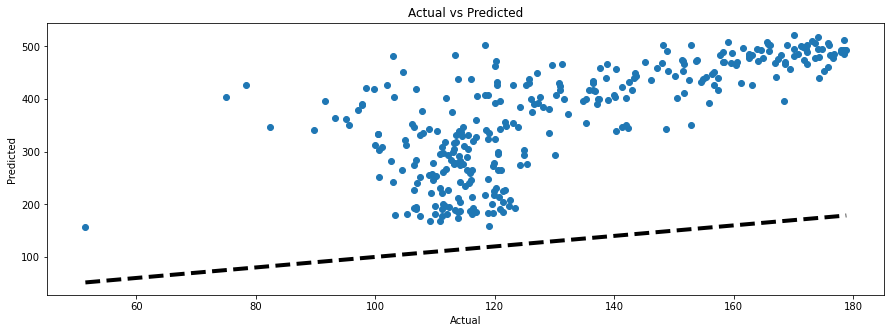

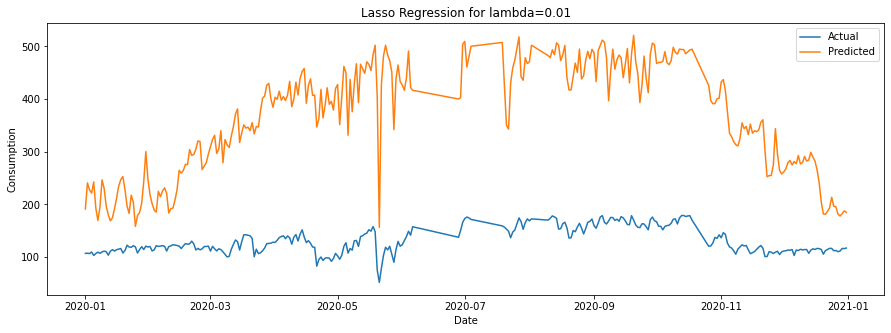

In [68]:
# Fit the model using the training data with lambda=100
w = lasso_regression(X_train, y_train, 0.01)

# Make predictions on the test data
y_pred = X_test.dot(w)

# Calculate RMSE and R-squared values
n = len(y_test)
rmse = np.sqrt(sum((y_test - y_pred)**2) / n)
tss = sum((y_test - np.mean(y_test))**2)
rss = sum((y_test - y_pred)**2)
r2 = 1 - rss/tss

# Print results
print('RMSE:', rmse)
print('R^2:', r2)

# Plot the original vs predicted values
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')

plt.show()

# Extract dates from the test set
dates = pd.to_datetime(test['Date'])

# Create a plot with the date on the x-axis and the consumption values on the y-axis
plt.figure(figsize=(15,5))
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_pred, label='Predicted')

# Add labels and legend to the plot
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Lasso Regression for lambda=0.01')
plt.legend()


# Show the plot
plt.show()


### Applying Lasso regression to the validation dataset with varying lambda and degree

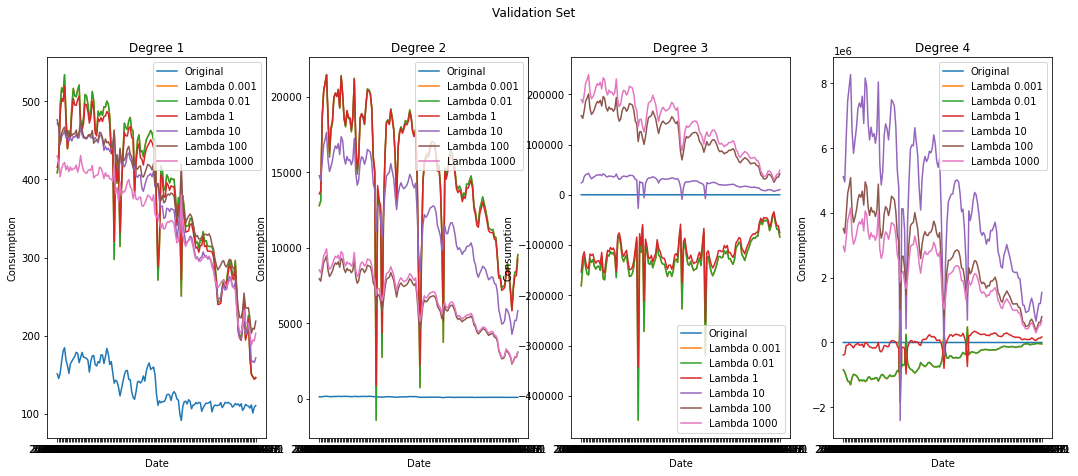

      Lambda  Degree          RMSE           R^2
0      0.001       1  2.593609e+02  1.094100e+02
1      0.010       1  2.592930e+02  1.093600e+02
2      1.000       1  2.524452e+02  1.037700e+02
3     10.000       1  2.373315e+02  9.135000e+01
4    100.000       1  2.495449e+02  9.982000e+01
5   1000.000       1  2.133016e+02  7.340000e+01
6      0.001       2  1.528995e+04  3.604660e+05
7      0.010       2  1.528958e+04  3.604487e+05
8      1.000       2  1.523587e+04  3.579278e+05
9     10.000       2  1.238796e+04  2.366998e+05
10   100.000       2  6.588309e+03  6.701127e+04
11  1000.000       2  6.911006e+03  7.373170e+04
12     0.001       3  1.335240e+05  2.747006e+07
13     0.010       3  1.333864e+05  2.741347e+07
14     1.000       3  1.183786e+05  2.159149e+07
15    10.000       3  2.728886e+04  1.148139e+06
16   100.000       3  1.268527e+05  2.479780e+07
17  1000.000       3  1.509012e+05  3.509061e+07
18     0.001       4  7.052269e+05  7.662956e+08
19     0.010       4

In [29]:
# Define a list of lambda values to try
lambda_values = [0.001, 0.01, 1, 10, 100, 1000]

# Define a list of degree values to try
degree_values = [1, 2, 3, 4]

# Initialize lists to store RMSE and R-squared values for each combination of lambda and degree
results = []

plt.figure(figsize=(18,7))
# Loop through lambda and degree values and fit a lasso regression model for each combination
for i, degree in enumerate(degree_values):
    plt.subplot(1, len(degree_values), i+1)
    plt.plot(validation['Date'], y_validation, label='Original')
    for lmbda in lambda_values:
        # Create polynomial features
        X_train_poly = np.column_stack([X_train ** d for d in range(1, degree + 1)])
        X_validation_poly = np.column_stack([X_validation ** d for d in range(1, degree + 1)])

        # Fit the model using the training data
        w = lasso_regression(X_train_poly, y_train, lmbda)
        
        # Make predictions on the validation data
        y_pred = X_validation_poly.dot(w)
        
        # Calculate RMSE and R-squared values
        mse = np.mean((y_pred - y_validation) ** 2)
        rmse = np.sqrt(mse)
        ssr = np.sum((y_pred - y_validation.mean()) ** 2)
        sst = np.sum((y_validation - y_validation.mean()) ** 2)
        r2 = ssr / sst
        
        # Append values to results list
        results.append({
            'Lambda': lmbda,
            'Degree': degree,
            'RMSE': rmse,
            'R^2': r2
        })
         # Plot the predicted values
        plt.plot(validation['Date'], y_pred, label=f"Lambda {lmbda}")
    plt.legend()
    plt.title(f'Degree {degree}')
    plt.xlabel('Date')
    plt.ylabel('Consumption')

plt.suptitle('Validation Set')
plt.show()
       
    
# Convert results list to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


### Applying Lasso regression for the test dataset with lambda=0.01 and degree=2

In [56]:
# Generate polynomial features for the training data
X_train_poly = np.ones((len(X_train), 1))
for i in range(1, degree+1):
    X_train_poly = np.hstack((X_train_poly, X_train**i))

# Normalize the training data
X_train_poly_norm = (X_train_poly - np.mean(X_train_poly[:,1:], axis=0)) / np.std(X_train_poly[:,1:], axis=0)


# Train the model on the training data
W = lasso_regression_d(X_train_poly_norm, y_train, lmbda=lmbda)

# Generate polynomial features for the test data
X_test_poly = np.ones((len(X_test), 1))
for i in range(1, degree+1):
    X_test_poly = np.hstack((X_test_poly, X_test**i))

# Normalize the test data using the mean and standard deviation of the training data
X_test_poly_norm = (X_test_poly - np.mean(X_train_poly[:,1:], axis=0)) / np.std(X_train_poly[:,1:], axis=0)

# Make predictions on the test data
y_test_pred = X_test_poly_norm.dot(W)

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))

# Calculate the R^2 score
ss_res = np.sum((y_test - y_test_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

# Plot the original and predicted consumption values for the test set
plt.figure(figsize=(15,5))
plt.plot(test['Date'], y_test, label='Original')
plt.plot(test['Date'], y_test_pred, label='Predicted')
plt.legend()
plt.title('Test Set')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

print(f"RMSE: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


ValueError: operands could not be broadcast together with shapes (551,13) (12,) 

### Using the scikit learn package to predict the test data

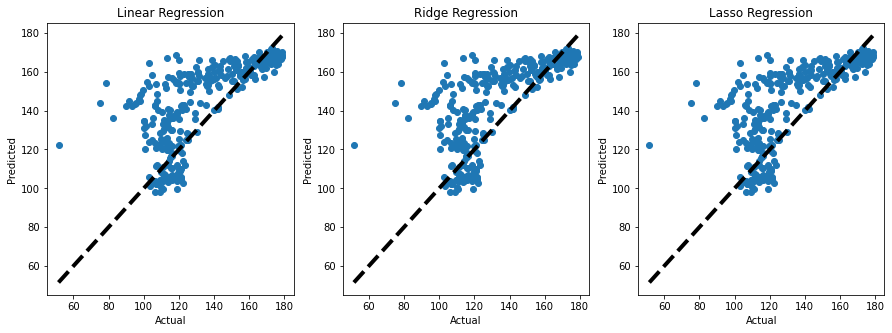

Linear regression RMSE: 21.597669129675975
Ridge regression RMSE: 21.597266863168553
Lasso regression RMSE: 21.597701712899998
Linear regression R-squared: 0.23495245429714406
Ridge regression R-squared: 0.2349809527555985
Lasso regression R-squared: 0.23495014592449293


In [25]:
# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Ridge regression with alpha=10
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# Lasso regression with alpha=0.01
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Make predictions on the test set
y_lin_pred = lin_reg.predict(X_test)
y_ridge_pred = ridge_reg.predict(X_test)
y_lasso_pred = lasso_reg.predict(X_test)

# Plot the actual vs predicted values for all models
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Linear regression plot
axs[0].scatter(y_test, y_lin_pred)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Linear Regression')

# Ridge regression plot
axs[1].scatter(y_test, y_ridge_pred)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Ridge Regression')

# Lasso regression plot
axs[2].scatter(y_test, y_lasso_pred)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')
axs[2].set_title('Lasso Regression')

plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the RMSE for each model
lin_rmse = mean_squared_error(y_test, y_lin_pred, squared=False)
ridge_rmse = mean_squared_error(y_test, y_ridge_pred, squared=False)
lasso_rmse = mean_squared_error(y_test, y_lasso_pred, squared=False)

print('Linear regression RMSE:', lin_rmse)
print('Ridge regression RMSE:', ridge_rmse)
print('Lasso regression RMSE:', lasso_rmse)

# Calculate the R-squared for each model
lin_r2 = r2_score(y_test, y_lin_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print('Linear regression R-squared:', lin_r2)
print('Ridge regression R-squared:', ridge_r2)
print('Lasso regression R-squared:', lasso_r2)
